# Objectives Of Data Analysis:
### Advanced data preparation: Build an ‘enriched’ customer profile by deriving “intelligent” KPIs such as:

1- Monthly average purchase and cash advance amount

2- Purchases by type (one-off, installments)

3- Average amount per purchase and cash advance transaction,

4- Limit usage (balance to credit limit ratio),

5- Payments to minimum payments ratio etc.

6- Advanced reporting: Use the derived KPIs to gain insight on the customer profiles.

7- Identification of the relationships/ affinities between services.

8- Clustering: Apply a data reduction technique factor analysis for variable reduction technique and a clustering algorithm  to reveal the behavioural segments of credit card holders

9- Identify cluster characterisitics of the cluster using detailed profiling.

10- Provide the strategic insights and implementation of strategies for given set of cluster characteristics

### Importing Libraries & Reading File

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# monthly average purchase and cash advance amount
# monthly average purchase = totol amount of purchases 

In [3]:
data = pd.read_csv("credit-card-data.csv")

### Attributes Information:
● CUST_ID Credit card holder ID

● BALANCE Monthly average balance (based on daily balance averages)

● BALANCE_FREQUENCY Ratio of last 12 months with balance

● PURCHASES Total purchase amount spent during last 12 months

● ONEOFF_PURCHASES Total amount of one-off purchases

● INSTALLMENTS_PURCHASES Total amount of installment purchases

● CASH_ADVANCE Total cash-advance amount

● PURCHASES_ FREQUENCY-Frequency of purchases (percentage of months
with at least on purchase)

● ONEOFF_PURCHASES_FREQUENCY Frequency of one-off-purchases

● PURCHASES_INSTALLMENTS_FREQUENCY Frequency of installment
purchases

● CASH_ADVANCE_ FREQUENCY Cash-Advance frequency

● AVERAGE_PURCHASE_TRX Average amount per purchase transaction

● CASH_ADVANCE_TRX Average amount per cash-advance transaction

● PURCHASES_TRX Average amount per purchase transaction

● CREDIT_LIMIT Credit limit

● PAYMENTS-Total payments (due amount paid by the customer to decrease their
statement balance) in the period

● MINIMUM_PAYMENTS Total minimum payments due in the period.

● PRC_FULL_PAYMENT- Percentage of months with full payment of the due
statement balance

● TENURE Number of months as a customer

In [4]:
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [5]:
# Getting Shape of the data
data.columns,data.shape

(Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
        'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
        'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
        'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
        'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
        'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
       dtype='object'), (8950, 18))

In [6]:
# Getiing five no. summary
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### Handling Missing Value

In [7]:
miss = pd.DataFrame(data.isnull().sum())
miss = miss.rename(columns={0:"miss_count"})
miss["miss_%"] = (miss.miss_count/len(data.CUST_ID))*100
miss

,miss_count,miss_%
CUST_ID,0,0.000000
BALANCE,0,0.000000
BALANCE_FREQUENCY,0,0.000000
PURCHASES,0,0.000000
ONEOFF_PURCHASES,0,0.000000
INSTALLMENTS_PURCHASES,0,0.000000
CASH_ADVANCE,0,0.000000
PURCHASES_FREQUENCY,0,0.000000
ONEOFF_PURCHASES_FREQUENCY,0,0.000000
PURCHASES_INSTALLMENTS_FREQUENCY,0,0.000000


we can see that only 2 columns have missing value and which are less than 30% of the total values so we can impute them.

### Imputing Missing Value
1. we will delete some know values from the data frame
2. then we will use diffrent imputing techniques 
3. we will compare all imputing technique with the actual value
4. we will choose the imputation technique whose results are closer to the actual values.

In [8]:
data1 =data.copy()

In [9]:
data1['MINIMUM_PAYMENTS'].loc[5],data1['MINIMUM_PAYMENTS'].loc[505],data1['MINIMUM_PAYMENTS'].loc[5005], data1['MINIMUM_PAYMENTS'].loc[8005] 

(2407.246035, 156.644197, 11142.93224, 153.957216)

#### Imputing Using Mean

In [10]:
data1 =data.copy()
data1['MINIMUM_PAYMENTS'].loc[5] = np.nan
data1['MINIMUM_PAYMENTS'].loc[505] = np.nan
data1['MINIMUM_PAYMENTS'].loc[5005] = np.nan
data1['MINIMUM_PAYMENTS'].loc[8005] = np.nan

/home/mayank/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [11]:
data1['MINIMUM_PAYMENTS'] = data1['MINIMUM_PAYMENTS'].fillna(data1['MINIMUM_PAYMENTS'].mean())

In [12]:
data1['MINIMUM_PAYMENTS'].loc[5],data1['MINIMUM_PAYMENTS'].loc[505],data1['MINIMUM_PAYMENTS'].loc[5005], data1['MINIMUM_PAYMENTS'].loc[8005] 

(863.001404633498, 863.001404633498, 863.001404633498, 863.001404633498)

#### Imputing using median

In [13]:
data1 =data.copy()
data1['MINIMUM_PAYMENTS'].loc[5] = np.nan
data1['MINIMUM_PAYMENTS'].loc[505] = np.nan
data1['MINIMUM_PAYMENTS'].loc[5005] = np.nan
data1['MINIMUM_PAYMENTS'].loc[8005] = np.nan

In [14]:
data1['MINIMUM_PAYMENTS'] = data1['MINIMUM_PAYMENTS'].fillna(data1['MINIMUM_PAYMENTS'].median())

In [15]:
data1['MINIMUM_PAYMENTS'].loc[5],data1['MINIMUM_PAYMENTS'].loc[505],data1['MINIMUM_PAYMENTS'].loc[5005], data1['MINIMUM_PAYMENTS'].loc[8005] 

(312.343947, 312.343947, 312.343947, 312.343947)

#### Imputing using interpolation

In [16]:
data1 =data.copy()
data1['MINIMUM_PAYMENTS'].loc[5] = np.nan
data1['MINIMUM_PAYMENTS'].loc[505] = np.nan
data1['MINIMUM_PAYMENTS'].loc[5005] = np.nan
data1['MINIMUM_PAYMENTS'].loc[8005] = np.nan

In [17]:
data1=data1.interpolate()

In [18]:
data1['MINIMUM_PAYMENTS'].loc[5],data1['MINIMUM_PAYMENTS'].loc[505],data1['MINIMUM_PAYMENTS'].loc[5005], data1['MINIMUM_PAYMENTS'].loc[8005] 

(221.4285655, 844.759233, 588.8944570000001, 1802.9210875)

#### Imputing using Knn imputation

In [26]:
data1 =data.copy()
data1['MINIMUM_PAYMENTS'].loc[5] = np.nan
data1['MINIMUM_PAYMENTS'].loc[505] = np.nan
data1['MINIMUM_PAYMENTS'].loc[5005] = np.nan
data1['MINIMUM_PAYMENTS'].loc[8005] = np.nan

/home/mayank/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [27]:
import impyute as impy
aa=list(data.columns)
aa.remove("CUST_ID")
d =impy.fast_knn(data1.iloc[:,1:], k=4)
d.columns =aa
data1.iloc[:,1:] = d

In [28]:
d.iloc[5,14],d.iloc[505,14],d.iloc[5005,14], d.iloc[8005,14] 

(1112.0873384612082, 863.0014046334994, 1554.3481299242012, 176.94312480907524)

In [29]:
data1['MINIMUM_PAYMENTS'].loc[5],data1['MINIMUM_PAYMENTS'].loc[505],data1['MINIMUM_PAYMENTS'].loc[5005], data1['MINIMUM_PAYMENTS'].loc[8005] 

(1112.0873384612082, 863.0014046334994, 1554.3481299242012, 176.94312480907524)

We can see that KNN has better results then mean, median, and interpolation in filling missing value so we will fill the missing values with KNN.

### Missing Values Removed.

In [31]:
miss = pd.DataFrame(data1.isnull().sum())
miss = miss.rename(columns={0:"miss_count"})
miss["miss_%"] = (miss.miss_count/len(data1.CUST_ID))*100
miss

,miss_count,miss_%
CUST_ID,0,0.0
BALANCE,0,0.0
BALANCE_FREQUENCY,0,0.0
PURCHASES,0,0.0
ONEOFF_PURCHASES,0,0.0
INSTALLMENTS_PURCHASES,0,0.0
CASH_ADVANCE,0,0.0
PURCHASES_FREQUENCY,0,0.0
ONEOFF_PURCHASES_FREQUENCY,0,0.0
PURCHASES_INSTALLMENTS_FREQUENCY,0,0.0


Here we can see that all values are complete now we can move ahead with further analysis.

### Deriving KPIs


#### 1- monthly average purchase and cash advance amount
* monthly average purchase = total amount of purchases / total tenure 
* monthly average cash advance = total cash advance / total tenure 

In [32]:
data2 = data1.copy()

In [33]:
data2["AVG_MONTH_PURCHASE"] = round(data2["PURCHASES"]/data2["TENURE"],2)
data2["AVG_MONTH_CASH_ADVANCE"] = round(data2["CASH_ADVANCE"]/data2["TENURE"],2)

#### 2- Purchases by type (one-off, installments)

In [34]:
data2[["ONEOFF_PURCHASES","INSTALLMENTS_PURCHASES"]].head()

,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
0,0.00,95.4
1,0.00,0.0
2,773.17,0.0
3,1499.00,0.0
4,16.00,0.0


#### From The Above 
we can see there are users which either purchase oneoff, installments, both or neither of the option lets segregate them with a label

In [35]:
# The below function segregate them into diffrent groups as per there characterstics.
def type_check(data2):
    if (data2.ONEOFF_PURCHASES!=0.0) and (data2.INSTALLMENTS_PURCHASES!=0.0 ):
        return "BOTH"
    elif (data2.ONEOFF_PURCHASES==0.0) and (data2.INSTALLMENTS_PURCHASES!=0.0 ):
        return "INSTALLMENTS"
    elif (data2.ONEOFF_PURCHASES!=0.0) and (data2.INSTALLMENTS_PURCHASES==0.0 ):
        return "ONEOFF"
    elif (data2.ONEOFF_PURCHASES==0.0) and (data2.INSTALLMENTS_PURCHASES==0.0):
        return "NONE"

In [36]:
# applying the function 
data2["PURCHASE_TYPE"] = data2.apply(type_check,axis=1)

In [37]:
data2["PURCHASE_TYPE"].value_counts()

BOTH            2774
INSTALLMENTS    2260
NONE            2042
ONEOFF          1874
Name: PURCHASE_TYPE, dtype: int64

#### 3- Average amount per purchase and cash advance transaction
*  Average amount per purchase transaction = total amount of purchases / total purchase transaction 
*  Average amount cash advance transaction = total cash advance / total cash_advance transcation

In [38]:
data2["AVG_AMT_PURCHASE_TRX"] = round(data2["PURCHASES"]/data2["PURCHASES_TRX"],2)
data2["AVG_AMT_CASH_ADVANCE_TRX"] = round(data2["CASH_ADVANCE"]/data2["CASH_ADVANCE_TRX"],2)
data2 = data2.fillna(0.0)

In [39]:
data2.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,AVG_MONTH_PURCHASE,AVG_MONTH_CASH_ADVANCE,PURCHASE_TYPE,AVG_AMT_PURCHASE_TRX,AVG_AMT_CASH_ADVANCE_TRX
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,...,1000.0,201.802084,139.509787,0.000000,12.0,7.95,0.00,INSTALLMENTS,47.70,0.00
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,...,7000.0,4103.032597,1072.340217,0.222222,12.0,0.00,536.91,NONE,0.00,1610.74
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,...,7500.0,622.066742,627.284787,0.000000,12.0,64.43,0.00,ONEOFF,64.43,0.00
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,...,7500.0,0.000000,540.060203,0.000000,12.0,124.92,17.15,ONEOFF,1499.00,205.79
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,...,1200.0,678.334763,244.791237,0.000000,12.0,1.33,0.00,ONEOFF,16.00,0.00


#### 4- Limit usage (balance to credit limit ratio)
It tells us how much debt someone is carring or how much credit they are using from there existing limit.
* credit utilization ratio = balance used by the customer / credit limit


In [40]:
data2["CREDIT_UTLIZATION_RATIO"] = round(data2["BALANCE"]/data2["CREDIT_LIMIT"],2)*100

In [41]:
data2.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,AVG_MONTH_PURCHASE,AVG_MONTH_CASH_ADVANCE,PURCHASE_TYPE,AVG_AMT_PURCHASE_TRX,AVG_AMT_CASH_ADVANCE_TRX,CREDIT_UTLIZATION_RATIO
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,...,201.802084,139.509787,0.000000,12.0,7.95,0.00,INSTALLMENTS,47.70,0.00,4.0
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,...,4103.032597,1072.340217,0.222222,12.0,0.00,536.91,NONE,0.00,1610.74,46.0
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,...,622.066742,627.284787,0.000000,12.0,64.43,0.00,ONEOFF,64.43,0.00,33.0
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,...,0.000000,540.060203,0.000000,12.0,124.92,17.15,ONEOFF,1499.00,205.79,22.0
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,...,678.334763,244.791237,0.000000,12.0,1.33,0.00,ONEOFF,16.00,0.00,68.0


#### 5- Payments to minimum payments ratio etc.

In [42]:
data2["PAY_MIN_PAY_RATIO"] = data2["PAYMENTS"]/data2["MINIMUM_PAYMENTS"]

#### 6- Using the derived KPIs to gain insight on the customer profiles.


In [43]:
data2.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE', 'AVG_MONTH_PURCHASE',
       'AVG_MONTH_CASH_ADVANCE', 'PURCHASE_TYPE', 'AVG_AMT_PURCHASE_TRX',
       'AVG_AMT_CASH_ADVANCE_TRX', 'CREDIT_UTLIZATION_RATIO',
       'PAY_MIN_PAY_RATIO'],
      dtype='object')

##### Distribution Of Purchase Types

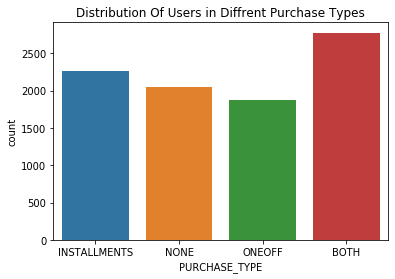

In [44]:
import seaborn as sns
#plt.bar(data2.PURCHASE_TYPE,data2.AVG_MONTH_PURCHASE)
sns.countplot(data=data2,x="PURCHASE_TYPE")
plt.title("Distribution Of Users in Diffrent Purchase Types")
plt.show()

##### Credit Utlization By Diffrent Purchase Types

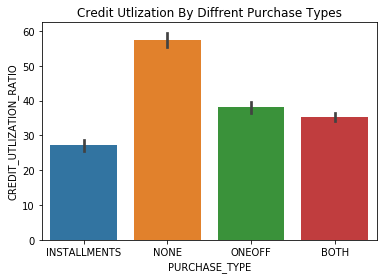

In [45]:
#plt.bar(data2.PURCHASE_TYPE,data2.AVG_MONTH_PURCHASE)
sns.barplot(data=data2,x="PURCHASE_TYPE",y="CREDIT_UTLIZATION_RATIO")
plt.title("Credit Utlization By Diffrent Purchase Types")
plt.show()

##### Total Of Purchases By Diffrent Purchase Type

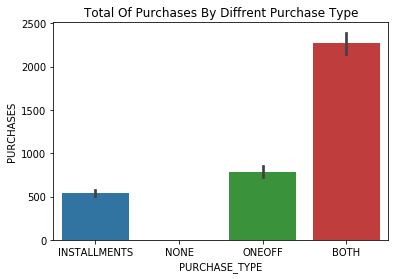

In [46]:
sns.barplot(data=data2,x="PURCHASE_TYPE",y="PURCHASES")
plt.title("Total Of Purchases By Diffrent Purchase Type")
plt.show()

#### 7- Identification of the Relationships/ affinities between services.


#####  Out of 8950 observation only 


In [47]:
def p_check(data2):
    if data2["PAY_MIN_PAY_RATIO"]==0.0 :
        return "paid_full_due"
    if data2["PAY_MIN_PAY_RATIO"]>0.0 :
        return "paid_min_due"
data2["PAYMENT_INFO"] = data2.apply(p_check,axis=1)

In [48]:
data2["PAYMENT_INFO"].value_counts()

paid_min_due     8710
paid_full_due     240
Name: PAYMENT_INFO, dtype: int64

* 240 users paid full dues
* the rest 8710 users only paid minimum dues of there card bill
* i.e 97 % user only pay min payment of there card bill

##### Joint two way Table of Payment Info and Purchase Type

In [49]:
pd.crosstab(data2["PURCHASE_TYPE"],data2["PAYMENT_INFO"])

PAYMENT_INFO,paid_full_due,paid_min_due
PURCHASE_TYPE,,
BOTH,28,2746
INSTALLMENTS,69,2191
NONE,68,1974
ONEOFF,75,1799


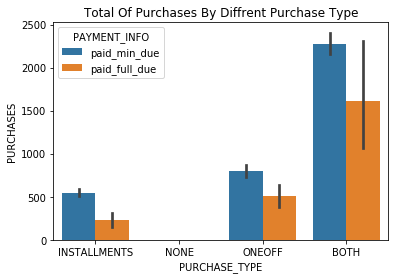

In [51]:
sns.barplot(data=data2,x="PURCHASE_TYPE",y="PURCHASES", hue="PAYMENT_INFO")
plt.title("Total Of Purchases By Diffrent Purchase Type")
plt.show()

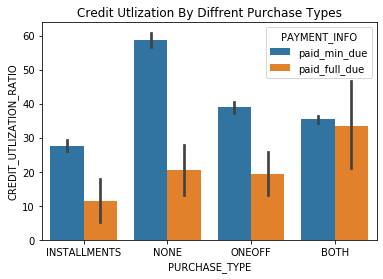

In [52]:
sns.barplot(data=data2,x="PURCHASE_TYPE",y="CREDIT_UTLIZATION_RATIO", hue="PAYMENT_INFO")
plt.title("Credit Utlization By Diffrent Purchase Types")
plt.show()

#### Removing Outlier

In [114]:
# using box plot
data3 = data2.copy()

cnames=list(data3.columns)
for i in cnames:
    if isinstance(data3[i].iloc[1] , float) or isinstance(data3[i].iloc[1] , int) :
        print(i)
        q75, q25 = np.percentile(data3.loc[:,i], [75 ,25])
        iqr = q75 - q25

        min = q25 - (iqr*1.5)
        max = q75 + (iqr*1.5)
        print(min)
        print(max)
    
        data3 = data3.drop(data3[data3.loc[:,i] < min].index)    
        data3 = data3.drop(data3[data3.loc[:,i] > max].index)
data3.shape
# creating the list of our purchase type
label = list(data3.PURCHASE_TYPE )

BALANCE
-2760.5052645
4942.9272155
BALANCE_FREQUENCY
0.5833325
1.2500005
PURCHASES
-1677.84875
2943.08125
ONEOFF_PURCHASES
-652.94625
1088.24375
INSTALLMENTS_PURCHASES
-628.6725
1047.7875
CASH_ADVANCE
-1674.0363720000003
2790.06062
PURCHASES_FREQUENCY
-1.3125
2.1875
ONEOFF_PURCHASES_FREQUENCY
-0.2500005
0.4166675
PURCHASES_INSTALLMENTS_FREQUENCY
-1.125
1.875
CASH_ADVANCE_FREQUENCY
-0.2500005
0.4166675
CASH_ADVANCE_TRX
-4.5
7.5
PURCHASES_TRX
-18.0
30.0
CREDIT_LIMIT
-2500.0
7900.0
PAYMENTS
-592.1819977499999
1742.90419225
MINIMUM_PAYMENTS
-462.5982571249998
1208.6587158749999
PRC_FULL_PAYMENT
-0.15000000000000002
0.25
TENURE
12.0
12.0
AVG_MONTH_PURCHASE
-52.6725
87.7875
AVG_MONTH_CASH_ADVANCE
-56.09625
93.49375
AVG_AMT_PURCHASE_TRX
-85.005
141.675
AVG_AMT_CASH_ADVANCE_TRX
-161.1825
268.6375
CREDIT_UTLIZATION_RATIO
-112.5
211.5
PAY_MIN_PAY_RATIO
-1.310831718549734
4.308729658738758


### Scaling Variables
Prior to applying a clustering algorithm we need to recentre the scales of our variables 
* First we will check convert all the objects into dummy variable.
* Second we will check for normality of data using jarque-bera test so that we can apply a suitable scaling technique.

##### Converting into Dummy Variables

In [115]:
col = list(data3.columns)
num = []
obj = []
for i in col:
    if isinstance(data3[i].iloc[1] , float) or isinstance(data3[i].iloc[1] , int) :
        num.append(i)
    else :
        obj.append(i)            

In [116]:
PURCHASE_TYPE=pd.get_dummies(data3[obj[1]])
PAYMENT_INFO=pd.get_dummies(data3[obj[2]])
data3=pd.concat([data3[num],PURCHASE_TYPE,PAYMENT_INFO],axis=1)

In [117]:
data3.head(2)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,AVG_AMT_PURCHASE_TRX,AVG_AMT_CASH_ADVANCE_TRX,CREDIT_UTLIZATION_RATIO,PAY_MIN_PAY_RATIO,BOTH,INSTALLMENTS,NONE,ONEOFF,paid_full_due,paid_min_due
0,40.900749,0.818182,95.4,0.0,95.4,0.0,0.166667,0.000000,0.083333,0.0,...,47.7,0.0,4.0,1.446508,0,1,0,0,0,1
4,817.714335,1.000000,16.0,16.0,0.0,0.0,0.083333,0.083333,0.000000,0.0,...,16.0,0.0,68.0,2.771075,0,0,0,1,0,1


##### Applying jarque_bera test on all the numerical variables of data frame
at alpha value of 0.05
* Null hypothesis: data comes from a normal distribution.
* Alternate hypothesis: data doesnot comes from a normal distribution.

In [118]:
from scipy import stats
alpha = 0.05
col = list(data3.columns)
f=1
for i in col:
     if isinstance(data3[i].iloc[1] , float) or isinstance(data3[i].iloc[1] , int) :
        print(i)
        stat,p = stats.jarque_bera(data3[i])
        print(stat, p)
        if p > alpha:
            print('Sample looks normal (fail to reject H0)')
        else:
            print('Sample does not look normal (reject H0)') 

BALANCE
138.63901655636792 0.0
Sample does not look normal (reject H0)
BALANCE_FREQUENCY
10685.384753916698 0.0
Sample does not look normal (reject H0)
PURCHASES
365.727352933399 0.0
Sample does not look normal (reject H0)
ONEOFF_PURCHASES
5020.506260244015 0.0
Sample does not look normal (reject H0)
INSTALLMENTS_PURCHASES
751.6235727834444 0.0
Sample does not look normal (reject H0)
CASH_ADVANCE
3270.37597898069 0.0
Sample does not look normal (reject H0)
PURCHASES_FREQUENCY
144.69568478901894 0.0
Sample does not look normal (reject H0)
ONEOFF_PURCHASES_FREQUENCY
843.3292276562219 0.0
Sample does not look normal (reject H0)
PURCHASES_INSTALLMENTS_FREQUENCY
190.09553740338364 0.0
Sample does not look normal (reject H0)
CASH_ADVANCE_FREQUENCY
448.69825641308137 0.0
Sample does not look normal (reject H0)
CASH_ADVANCE_TRX
585.6272517198349 0.0
Sample does not look normal (reject H0)
PURCHASES_TRX
349.6255594799065 0.0
Sample does not look normal (reject H0)
CREDIT_LIMIT
667.2463453716421

/home/mayank/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1600: RuntimeWarning: invalid value encountered in double_scalars
  skewness = (1 / n * np.sum(diffx**3)) / (1 / n * np.sum(diffx**2))**(3 / 2.)
/home/mayank/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1601: RuntimeWarning: invalid value encountered in double_scalars
  kurtosis = (1 / n * np.sum(diffx**4)) / (1 / n * np.sum(diffx**2))**2


Since p-value is less than our alpha which shows strong evidence against our Null hypothesis 
* we will Reject the null hypothesis stating that the following columns the dataframe are not normal

#### Since are data is not normal we will scale the variable using min max normalization technique

In [119]:
#importing minmax scaler
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
#scaler = preprocessing.StandardScaler()

In [120]:
# converting our data frame into matrix
data3 = data3.as_matrix().astype(np.float)
data3 =np.nan_to_num(data3)

/home/mayank/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [121]:
# applying scaler on our data and coverting i into a data frame
data3_minmax = pd.DataFrame((scaler.fit_transform(data3)))


In [122]:
# renaming columns
data3_minmax.columns = col

In [123]:
data3_minmax.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,AVG_AMT_PURCHASE_TRX,AVG_AMT_CASH_ADVANCE_TRX,CREDIT_UTLIZATION_RATIO,PAY_MIN_PAY_RATIO,BOTH,INSTALLMENTS,NONE,ONEOFF,paid_full_due,paid_min_due
0,0.009081,0.5,0.091342,0.000000,0.093460,0.000000,0.166667,0.000000,0.083333,0.0,...,0.337102,0.000000,0.035398,0.335822,0.0,1.0,0.0,0.0,0.0,1.0
1,0.187469,1.0,0.015319,0.015682,0.000000,0.000000,0.083333,0.199999,0.000000,0.0,...,0.113074,0.000000,0.601770,0.643335,0.0,0.0,0.0,1.0,0.0,1.0
2,0.418474,1.0,0.417644,0.000000,0.427329,0.000000,1.000000,0.000000,1.000000,0.0,...,0.256890,0.000000,0.699115,0.296320,0.0,1.0,0.0,0.0,0.0,1.0
3,0.038678,1.0,0.382601,0.000000,0.391473,0.000000,1.000000,0.000000,1.000000,0.0,...,0.235336,0.000000,0.053097,0.306650,0.0,1.0,0.0,0.0,0.0,1.0
4,0.370781,1.0,0.097661,0.099971,0.000000,0.219307,0.166667,0.400000,0.000000,0.6,...,0.360424,0.183134,0.840708,0.212797,0.0,0.0,0.0,1.0,0.0,1.0


### Feature Selection using  a Technique PCA which is a Derivative Of Factor Analysis

In [124]:
# Importing PCA
from sklearn.decomposition import PCA

In [125]:
#We have 29 features so our n_component will be 29.
pc=PCA(n_components=29)
cr_pca=pc.fit(data3_minmax)

In [126]:
# Sum of variance explained by all components
sum(cr_pca.explained_variance_ratio_)

0.9999999999999998

In [127]:
# calculating optimal no. of compnents
cumm_var={}
for n in range(2,29):
    pc=PCA(n_components=n)
    cr_pca=pc.fit(data3_minmax)
    cumm_var[n]=sum(cr_pca.explained_variance_ratio_)

In [128]:
cumm_var

{2: 0.5176157354882318,
 3: 0.6456257836672145,
 4: 0.7248220377263954,
 5: 0.7866797834299566,
 6: 0.8192927924922857,
 7: 0.8505474303257174,
 8: 0.8765404300956708,
 9: 0.8994749248152306,
 10: 0.9177640330545935,
 11: 0.9349378422243756,
 12: 0.9490023488372251,
 13: 0.9614628971968303,
 14: 0.9728042920081588,
 15: 0.9792058344910047,
 16: 0.9846123470016804,
 17: 0.9890474378588885,
 18: 0.9923541337317634,
 19: 0.9948404386557832,
 20: 0.9967079732150197,
 21: 0.998215542772545,
 22: 0.9995382896716255,
 23: 0.9999879537255736,
 24: 0.9999999997205579,
 25: 0.9999999998916111,
 26: 0.9999999999999998,
 27: 0.9999999999999998,
 28: 0.9999999999999998}

##### Creating a Skree Plot

In [129]:
com = list(cumm_var.keys())
variance = list(cumm_var.values())

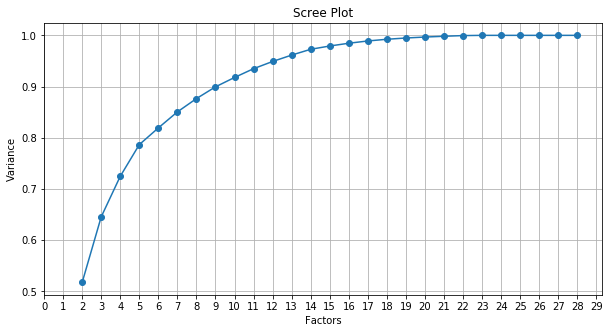

In [130]:
plt.figure(figsize=(10,5))
plt.plot(com,variance, marker ="o")

plt.xticks(range( 0, 30 ))

plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Variance')

plt.grid()
plt.show()

#### From the Above chart we can see after the 14th Component the Variance tends to Increase very slowly.
So, 14 will be are optimal no. of component which explains around 97% variance

In [131]:
# applying and reducing our data set with 14 component
pc_final=PCA(n_components=14).fit(data3_minmax)
reduced_cr=pc_final.fit_transform(data3_minmax)

In [132]:
d_clust = pd.DataFrame(reduced_cr)

In [133]:
d_clust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 14 columns):
0     1359 non-null float64
1     1359 non-null float64
2     1359 non-null float64
3     1359 non-null float64
4     1359 non-null float64
5     1359 non-null float64
6     1359 non-null float64
7     1359 non-null float64
8     1359 non-null float64
9     1359 non-null float64
10    1359 non-null float64
11    1359 non-null float64
12    1359 non-null float64
13    1359 non-null float64
dtypes: float64(14)
memory usage: 148.8 KB


### Applying Clustering algorithm

##### Kmeans

In [134]:
from sklearn.cluster import KMeans

#Estimate optimum number of clusters
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters).fit(d_clust)
    cluster_errors.append(clusters.inertia_)
    
#Create dataframe with cluster errors
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

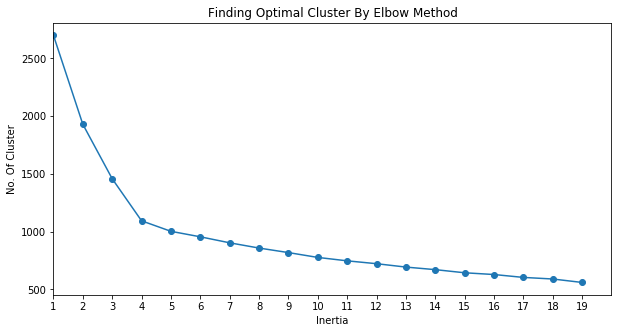

In [135]:
plt.figure(figsize=(10,5))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors,marker = "o")#", data=clusters_df)
plt.xlim(1,20)
plt.xticks(cluster_range)
plt.title('Finding Optimal Cluster By Elbow Method')
plt.xlabel('Inertia')
plt.ylabel('No. Of Cluster')

plt.show()

In [136]:
Kmeans = KMeans(4).fit(d_clust)

In [137]:
# Predicting labels usind our model 
clust_label = list(Kmeans.predict(d_clust))
len(clust_label)

1359

In [138]:
data3

array([[4.09007490e+01, 8.18182000e-01, 9.54000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [8.17714335e+02, 1.00000000e+00, 1.60000000e+01, ...,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.82365274e+03, 1.00000000e+00, 4.36200000e+02, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [3.90618780e+01, 1.00000000e+00, 2.97020000e+02, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.14423990e+01, 6.36364000e-01, 8.20000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [8.70260090e+01, 1.00000000e+00, 6.05520000e+02, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [139]:
# converting it to form a data frame
conf = pd.DataFrame({"cluster":clust_label,"label":label})

# creating a Two way table to evaluate our cluuster
pd.crosstab(conf.cluster,conf.label)

label,BOTH,INSTALLMENTS,NONE,ONEOFF
cluster,,,,
0,0,448,0,0
1,0,1,375,0
2,271,0,0,0
3,0,0,0,264


##### Output
* Almost two third of the records were outliers and were removed during the process.
* It was necessary because Kmeans is affected by outliers and extreem values
* 4 is the optimum no. of cluster

##### Kmedoids
* Since kmeans removing outliers was a neccesity but it came with a cost of loss of almost half of the information in order to prevent the loss of data we need to use a method that is robust to outliers and extreem values and its called k medoids well medoids has almost same math but instead of estimating centroids using mean it takes the closest observation and use it to define the cluster which is called as a medoid.

In [162]:
data4 = data2.copy()


In [163]:
col = list(data4.columns)
num = []
obj = []
for i in col:
    if isinstance(data4[i].iloc[1] , float) or isinstance(data4[i].iloc[1] , int) :
        num.append(i)
    else :
        obj.append(i)            
obj

['CUST_ID', 'PURCHASE_TYPE', 'PAYMENT_INFO']

In [164]:
PURCHASE_TYPE=pd.get_dummies(data4[obj[1]])
PAYMENT_INFO=pd.get_dummies(data4[obj[2]])
data4=pd.concat([data4[num],PURCHASE_TYPE,PAYMENT_INFO],axis=1)

In [165]:
data4.head(2)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,AVG_AMT_PURCHASE_TRX,AVG_AMT_CASH_ADVANCE_TRX,CREDIT_UTLIZATION_RATIO,PAY_MIN_PAY_RATIO,BOTH,INSTALLMENTS,NONE,ONEOFF,paid_full_due,paid_min_due
0,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,0.00,...,47.7,0.00,4.0,1.446508,0,1,0,0,0,1
1,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,0.25,...,0.0,1610.74,46.0,3.826241,0,0,1,0,0,1


##### Applying jarque_bera test on all the numerical variables of data frame
at alpha value of 0.05
* Null hypothesis: data comes from a normal distribution.
* Alternate hypothesis: data doesnot comes from a normal distribution.

In [166]:
from scipy import stats
alpha = 0.05
col = list(data4.columns)
f=1
for i in col:
     if isinstance(data4[i].iloc[1] , float) or isinstance(data4[i].iloc[1] , int) :
        print(i)
        stat,p = stats.jarque_bera(data4[i])
        print(stat, p)
        if p > alpha:
            print('Sample looks normal (fail to reject H0)')
        else:
            print('Sample does not look normal (reject H0)') 

BALANCE
30478.944630569007 0.0
Sample does not look normal (reject H0)
BALANCE_FREQUENCY
9664.82603475827 0.0
Sample does not look normal (reject H0)
PURCHASES
4720632.574071898 0.0
Sample does not look normal (reject H0)
ONEOFF_PURCHASES
10192077.724852117 0.0
Sample does not look normal (reject H0)
INSTALLMENTS_PURCHASES
3553618.4819691475 0.0
Sample does not look normal (reject H0)
CASH_ADVANCE
1082164.4779776093 0.0
Sample does not look normal (reject H0)
PURCHASES_FREQUENCY
1006.4210400779638 0.0
Sample does not look normal (reject H0)
ONEOFF_PURCHASES_FREQUENCY
4018.5821501628247 0.0
Sample does not look normal (reject H0)
PURCHASES_INSTALLMENTS_FREQUENCY
1116.0118226638558 0.0
Sample does not look normal (reject H0)
CASH_ADVANCE_FREQUENCY
9127.305455547898 0.0
Sample does not look normal (reject H0)
CASH_ADVANCE_TRX
1464405.654579568 0.0
Sample does not look normal (reject H0)
PURCHASES_TRX
482891.40977187443 0.0
Sample does not look normal (reject H0)
CREDIT_LIMIT
6454.07873699

/home/mayank/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1599: RuntimeWarning: invalid value encountered in subtract
  diffx = x - mu


#### Again
Since p-value is less than our alpha which shows strong evidence against our Null hypothesis 
* we will Reject the null hypothesis stating that the following columns the dataframe are not normal

#### Since are data is not normal we will scale the variable using min max normalization technique

In [167]:
#importing minmax scaler
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
#scaler = preprocessing.StandardScaler()

In [168]:
# converting our data frame into matrix
data4 = data4.as_matrix().astype(np.float)
data4 =np.nan_to_num(data4)

/home/mayank/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [169]:
# applying scaler on our data and coverting i into a data frame
data4_minmax = pd.DataFrame((scaler.fit_transform(data4)))


/home/mayank/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/mayank/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [170]:
# renaming columns
data4_minmax.columns = col

In [171]:
data4_minmax.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,AVG_AMT_PURCHASE_TRX,AVG_AMT_CASH_ADVANCE_TRX,CREDIT_UTLIZATION_RATIO,PAY_MIN_PAY_RATIO,BOTH,INSTALLMENTS,NONE,ONEOFF,paid_full_due,paid_min_due
0,0.002148,0.818182,0.001945,0.000000,0.00424,0.000000,0.166667,0.000000,0.083333,0.000000,...,2.653401e-307,0.000000,0.002514,0.000211,0.0,1.0,0.0,0.0,0.0,1.0
1,0.168169,0.909091,0.000000,0.000000,0.00000,0.136685,0.000000,0.000000,0.000000,0.166667,...,0.000000e+00,0.108566,0.028913,0.000559,0.0,0.0,1.0,0.0,0.0,1.0
2,0.131026,1.000000,0.015766,0.018968,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,...,3.584038e-307,0.000000,0.020742,0.000145,0.0,0.0,0.0,1.0,0.0,1.0
3,0.087521,0.636364,0.030567,0.036775,0.00000,0.004366,0.083333,0.083333,0.000000,0.055555,...,8.338464e-306,0.013871,0.013828,0.000000,0.0,0.0,0.0,1.0,1.0,0.0
4,0.042940,1.000000,0.000326,0.000393,0.00000,0.000000,0.083333,0.083333,0.000000,0.000000,...,8.900295e-308,0.000000,0.042740,0.000405,0.0,0.0,0.0,1.0,0.0,1.0


### Feature Selection using  a Technique PCA which is a Derivative Of Factor Analysis

In [172]:
# Importing PCA
from sklearn.decomposition import PCA

In [173]:
#We have 29 features so our n_component will be 29.
pc=PCA(n_components=29)
cr_pca=pc.fit(data4_minmax)

In [174]:
# Sum of variance explained by all components
sum(cr_pca.explained_variance_ratio_)

1.0

In [175]:
# calculating optimal no. of compnents
cumm_var={}
for n in range(2,29):
    pc=PCA(n_components=n)
    cr_pca=pc.fit(data4_minmax)
    cumm_var[n]=sum(cr_pca.explained_variance_ratio_)

In [176]:
cumm_var

{2: 0.5734467255492774,
 3: 0.733124626341424,
 4: 0.7899367724815167,
 5: 0.8422064036762396,
 6: 0.8796183071991782,
 7: 0.9121895749115927,
 8: 0.9367276529240632,
 9: 0.9584091624662088,
 10: 0.9744986343698875,
 11: 0.982884255328545,
 12: 0.9879636579089802,
 13: 0.9910344650450933,
 14: 0.9937853654011337,
 15: 0.9956836275968762,
 16: 0.9966904702302166,
 17: 0.9974344653274336,
 18: 0.997999813008012,
 19: 0.9985373442302076,
 20: 0.9990152117060345,
 21: 0.999374736607148,
 22: 0.9995999668008381,
 23: 0.9998001956631161,
 24: 0.9999703399971946,
 25: 0.9999943459099183,
 26: 0.9999999858966716,
 27: 1.0,
 28: 1.0}

##### Creating a Skree Plot

In [177]:
com = list(cumm_var.keys())
variance = list(cumm_var.values())

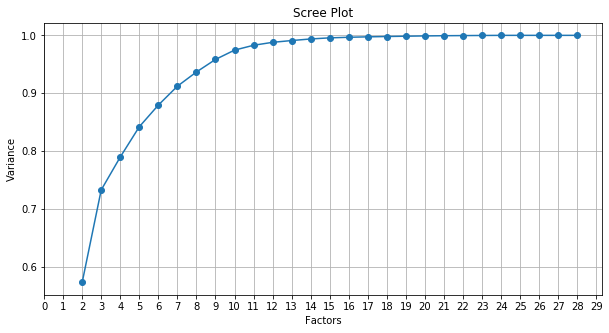

In [178]:
plt.figure(figsize=(10,5))
plt.plot(com,variance, marker ="o")

plt.xticks(range( 0, 30 ))

plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Variance')

plt.grid()
plt.show()

#### From the Above chart we can see after the 10th Component the Variance tends to Increase very slowly.
So, 10 will be are optimal no. of component which explains around 97% variance

In [179]:
# applying and reducing our data set with 10 component
pc_final=PCA(n_components=14).fit(data4_minmax)
reduced_cr=pc_final.fit_transform(data4_minmax)

In [182]:
d_clust1 = pd.DataFrame(reduced_cr)

In [183]:
from sklearn_extra.cluster import KMedoids
#Estimate optimum number of clusters
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMedoids(num_clusters).fit(d_clust1)
    cluster_errors.append(clusters.inertia_)
    
#Create dataframe with cluster errors
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

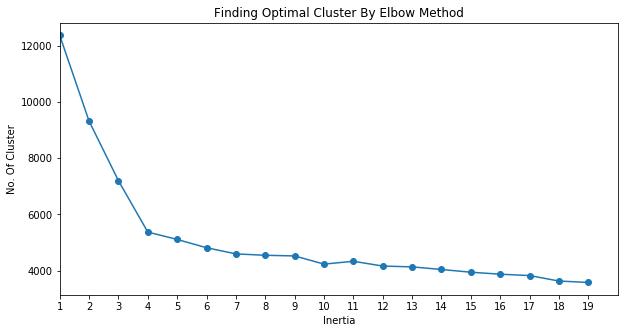

In [184]:
plt.figure(figsize=(10,5))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors,marker = "o")#", data=clusters_df)
plt.xlim(1,20)
plt.xticks(cluster_range)
plt.title('Finding Optimal Cluster By Elbow Method')
plt.xlabel('Inertia')
plt.ylabel('No. Of Cluster')
plt.show()

#### The optimum no. of clusters using K-medoids is 4

now lets construct our model Using Kmedoids and then evaluate  it using our earlier created KPI PURCHASE_TYPE

In [185]:
#Creating cluster using Kmedoids
clust_final = KMeans(4).fit(d_clust1)

In [186]:
# Predicting labels usind our model 
clust_label = list(clust_final.predict(d_clust1))
len(clust_label)

8950

In [187]:
# creating the list of our purchase type
label = list(data2.PURCHASE_TYPE )

In [188]:
# converting it to form a data frame
conf = pd.DataFrame({"cluster":clust_label,"label":label})

In [189]:
# creating a Two way table to evaluate our cluuster
pd.crosstab(conf.cluster,conf.label)

label,BOTH,INSTALLMENTS,NONE,ONEOFF
cluster,,,,
0,0,0,2042,0
1,2774,0,0,0
2,0,2260,0,0
3,0,0,0,1874


### Output
* On Using K-medoids we got the same cluster and there was no loss of information which was involved while using kmeans. 